<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.388351,47.441262,67.569543,0.007262,175.406417,175.396035,0.010382
1,0.0,1.0,46.546518,20.737582,64.046801,-0.007040,141.323861,141.323013,0.000848
2,0.0,2.0,54.344475,77.553251,45.971401,0.002261,187.871388,187.870975,0.000413
3,0.0,3.0,73.623365,30.953358,67.953463,-0.018398,182.511789,182.524432,-0.012643
4,0.0,4.0,22.446195,58.919034,95.699773,0.000470,187.065471,187.064039,0.001432
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.236438,20.426350,31.965467,-0.005993,145.622261,145.627772,-0.005512
19996,999.0,16.0,45.657898,36.880168,21.952023,0.000731,114.490820,114.490455,0.000365
19997,999.0,17.0,27.361679,39.080800,71.776886,0.003237,148.222603,148.223670,-0.001068
19998,999.0,18.0,67.068193,62.190709,48.095741,-0.000032,187.354611,187.353907,0.000705


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.388351,47.441262,67.569543,0.007262,175.406417,175.396035,0.010382
1,0.0,1.0,46.546518,20.737582,64.046801,-0.007040,141.323861,141.323013,0.000848
2,0.0,2.0,54.344475,77.553251,45.971401,0.002261,187.871388,187.870975,0.000413
3,0.0,3.0,73.623365,30.953358,67.953463,-0.018398,182.511789,182.524432,-0.012643
4,0.0,4.0,22.446195,58.919034,95.699773,0.000470,187.065471,187.064039,0.001432
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.236438,20.426350,31.965467,-0.005993,145.622261,145.627772,-0.005512
19996,999.0,16.0,45.657898,36.880168,21.952023,0.000731,114.490820,114.490455,0.000365
19997,999.0,17.0,27.361679,39.080800,71.776886,0.003237,148.222603,148.223670,-0.001068
19998,999.0,18.0,67.068193,62.190709,48.095741,-0.000032,187.354611,187.353907,0.000705


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.388351  47.441262  67.569543  ...  175.406417  175.396035  0.010382
      1.0    46.546518  20.737582  64.046801  ...  141.323861  141.323013  0.000848
      2.0    54.344475  77.553251  45.971401  ...  187.871388  187.870975  0.000413
      3.0    73.623365  30.953358  67.953463  ...  182.511789  182.524432 -0.012643
      4.0    22.446195  58.919034  95.699773  ...  187.065471  187.064039  0.001432
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   83.236438  20.426350  31.965467  ...  145.622261  145.627772 -0.005512
      16.0   45.657898  36.880168  21.952023  ...  114.490820  114.490455  0.000365
      17.0   27.361679  39.080800  71.776886  ...  148.222603  148.223670 -0.001068
      18.0   67.068193  62.190709  48.095741  ...  187.354611  187.353907  0.000705
      19.0   25.131449  30.616587  55.993539  ...  121.735981  121.745532 -0.009551

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.388351  47.441262  67.569543  ...  175.406417  175.396035  0.010382
      1.0    46.546518  20.737582  64.046801  ...  141.323861  141.323013  0.000848
      2.0    54.344475  77.553251  45.971401  ...  187.871388  187.870975  0.000413
      3.0    73.623365  30.953358  67.953463  ...  182.511789  182.524432 -0.012643
      4.0    22.446195  58.919034  95.699773  ...  187.065471  187.064039  0.001432
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   83.236438  20.426350  31.965467  ...  145.622261  145.627772 -0.005512
      16.0   45.657898  36.880168  21.952023  ...  114.490820  114.490455  0.000365
      17.0   27.361679  39.080800  71.776886  ...  148.222603  148.223670 -0.001068
      18.0   67.068193  62.190709  48.095741  ...  187.354611  187.353907  0.000705
      19.0   25.131449  30.616587  55.993539  ...  121.735981  121.745532 -0.009551

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.388351,47.441262,67.569543,0.007262,175.406417,175.396035,0.010382
1,0.0,1.0,46.546518,20.737582,64.046801,-0.007040,141.323861,141.323013,0.000848
2,0.0,2.0,54.344475,77.553251,45.971401,0.002261,187.871388,187.870975,0.000413
3,0.0,3.0,73.623365,30.953358,67.953463,-0.018398,182.511789,182.524432,-0.012643
4,0.0,4.0,22.446195,58.919034,95.699773,0.000470,187.065471,187.064039,0.001432
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.236438,20.426350,31.965467,-0.005993,145.622261,145.627772,-0.005512
19996,999.0,16.0,45.657898,36.880168,21.952023,0.000731,114.490820,114.490455,0.000365
19997,999.0,17.0,27.361679,39.080800,71.776886,0.003237,148.222603,148.223670,-0.001068
19998,999.0,18.0,67.068193,62.190709,48.095741,-0.000032,187.354611,187.353907,0.000705


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.388351  47.441262  67.569543  ...  175.406417  175.396035  0.010382
      1.0    46.546518  20.737582  64.046801  ...  141.323861  141.323013  0.000848
      2.0    54.344475  77.553251  45.971401  ...  187.871388  187.870975  0.000413
      3.0    73.623365  30.953358  67.953463  ...  182.511789  182.524432 -0.012643
      4.0    22.446195  58.919034  95.699773  ...  187.065471  187.064039  0.001432
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   83.236438  20.426350  31.965467  ...  145.622261  145.627772 -0.005512
      16.0   45.657898  36.880168  21.952023  ...  114.490820  114.490455  0.000365
      17.0   27.361679  39.080800  71.776886  ...  148.222603  148.223670 -0.001068
      18.0   67.068193  62.190709  48.095741  ...  187.354611  187.353907  0.000705
      19.0   25.131449  30.616587  55.993539  ...  121.735981  121.745532 -0.009551

[20000 rows x 7 columns]

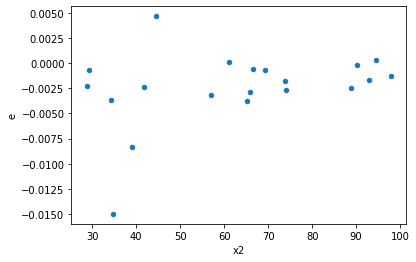

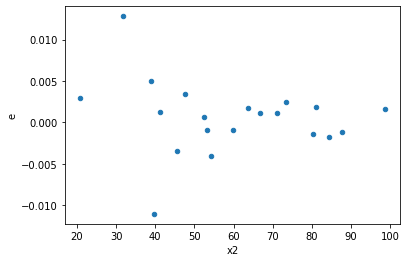

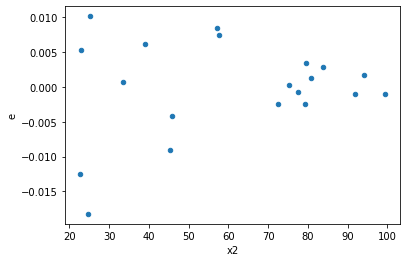

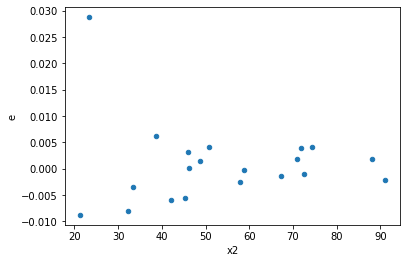

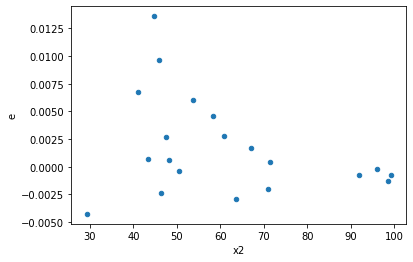

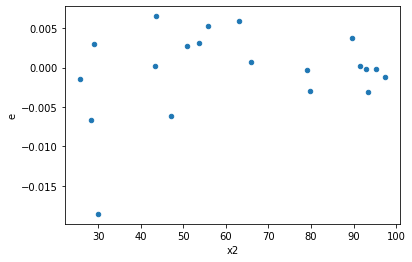

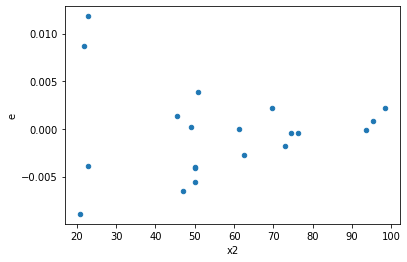

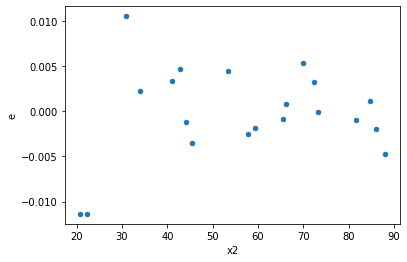

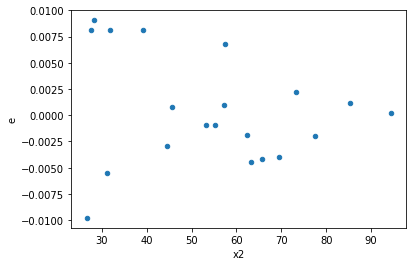

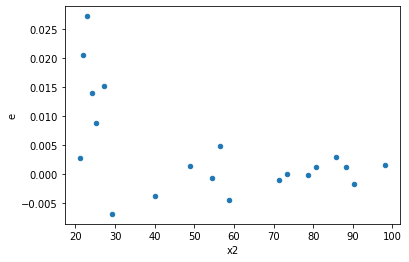

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
40.0,5.0,5.0,4.104766349765157e-06,7.790914940434376e-06,8.209532699530313e-07,1.5581829880868752e-06,1.8980166656453203,0.4988317533282358,0.7505841233358821,0.2494158766641179,Reject005=1 : Homoscedasticity
71.0,5.0,5.0,1.4158485488790161e-05,3.7573220890621394e-05,2.831697097758032e-06,7.514644178124279e-06,2.6537598898109276,0.307836734578143,0.8460816327109285,0.1539183672890715,Reject005=1 : Homoscedasticity
104.0,5.0,5.0,1.1280742310461448e-05,1.6362636106988403e-05,2.2561484620922894e-06,3.2725272213976807e-06,1.4504928538092878,0.6931544471996376,0.6534227764001812,0.3465772235998188,Reject005=1 : Homoscedasticity
112.0,5.0,5.0,1.7847741811725233e-05,2.569814647538159e-05,3.5695483623450467e-06,5.1396292950763185e-06,1.4398542261799734,0.6988981019777749,0.6505509490111125,0.34944905098888746,Reject005=1 : Homoscedasticity
113.0,5.0,5.0,1.2486480915522087e-05,2.0589793956954735e-05,2.497296183104417e-06,4.117958791390947e-06,1.6489669184020717,0.5964623255451735,0.7017688372274132,0.29823116277258677,Reject005=1 : Homoscedasticity
195.0,5.0,5.0,3.3059894496515635e-06,7.152570884213329e-06,6.611978899303127e-07,1.430514176842666e-06,2.1635189685699627,0.4169752353618932,0.7915123823190534,0.2084876176809466,Reject005=1 : Homoscedasticity
224.0,5.0,5.0,2.1237326233601833e-05,3.067374386142948e-05,4.247465246720367e-06,6.134748772285896e-06,1.4443317169040464,0.6964732632199766,0.6517633683900117,0.3482366316099883,Reject005=1 : Homoscedasticity
333.0,5.0,5.0,3.783157372665337e-05,4.179765889161349e-05,7.5663147453306735e-06,8.359531778322698e-06,1.1048353207195796,0.9155500214105325,0.5422249892947337,0.45777501070526627,Reject005=1 : Homoscedasticity
356.0,5.0,5.0,1.2022003541204603e-05,2.0671800886047292e-05,2.4044007082409206e-06,4.134360177209458e-06,1.7194971549622402,0.5664052505502217,0.7167973747248891,0.28320262527511086,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.0001930098070580096,2.2125213080003717e-05,3.860196141160192e-05,4.425042616000743e-06,0.11463258482691466,0.032874337526936415,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,0.0004617754275441086,4.431750117702084e-06,9.235508550882172e-05,8.863500235404168e-07,0.009597197800826605,9.475058928342737e-05,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,5.196168939383953e-05,2.6829367405304405e-05,1.0392337878767907e-05,5.365873481060881e-06,0.516329775230234,0.4856144761532217,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,0.0002313096274064074,3.44008748138983e-05,4.626192548128148e-05,6.88017496277966e-06,0.14872219197974196,0.05667181458854643,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,6.25897876015258e-05,3.19399285076063e-06,1.2517957520305158e-05,6.38798570152126e-07,0.051030575005222865,0.00535293285058196,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,0.00029073808631826267,3.215525521833252e-05,5.8147617263652536e-05,6.431051043666504e-06,0.11059870285839703,0.030445750897128046,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,0.00018150355319953882,2.9532732982598375e-05,3.630071063990776e-05,5.906546596519675e-06,0.16271159689161072,0.06799342703418693,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,6.439460929392405e-05,1.1659801801355909e-05,1.287892185878481e-05,2.331960360271182e-06,0.18106797959027401,0.08406399190845247,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,0.0002550839062420957,3.543095919791875e-05,5.101678124841914e-05,7.08619183958375e-06,0.13889923405944649,0.0492404029106119,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    645
Reject005=1 : Homoscedasticity      355
Name: Result_test, dtype: int64